In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from astropy import table
import seaborn as sns

In [2]:
scotchpath = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/"

In [46]:
def collect_snana_outputs(path): #path may be single or list
    if type(path)==str:
        headfiles = sorted(glob.glob(path+ '*HEAD.FITS*'))
        photfiles = sorted(glob.glob(path+ '*PHOT.FITS*'))
    elif type(path)==list:
        headfiles = []
        photfiles = []
        for p in path:
            headfiles.extend(sorted(glob.glob(p+ '*HEAD.FITS*')))
            photfiles.extend(sorted(glob.glob(p+ '*HEAD.FITS*')))
    c=0
    for file in headfiles[:1]:
        if c==0:
            headfile = table.Table.read(file, format='fits').to_pandas()
        else:
            headfile=headfile.append(table.Table.read(file, format='fits').to_pandas())
        c+=1
    return headfile

/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_KN_K17/
2.932006359100342 0.14147482812404633
/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_SNIax/
2.94858717918396 0.1862424910068512
/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_SNIIb+HostXT_V19/
2.942556381225586 0.26119154691696167
/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_SNII+HostXT_V19/
2.932006359100342 0.26119154691696167
/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_SNIb-Templates/
2.932006359100342 0.26119154691696167
/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_SNIa-91bg/
2.947144031524658 0.26119154691696167
/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_TDE/
2.496781826019287 0.08101586997509003
/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k_0413/MLAG_SCOTCH10k_SNIcBL+HostXT_V19/
2.942556381225586 0.26119154691696167
/glob

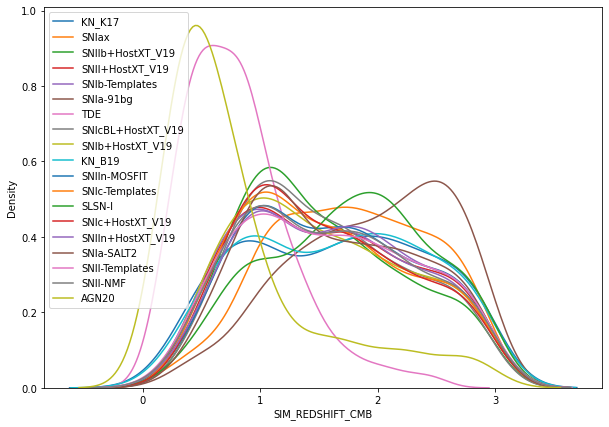

In [47]:
plt.figure(figsize=[10,7])
# ax = plt.subplots(1,1,figsize=[6,6])
for d in os.listdir(scotchpath):
    print(scotchpath+d+'/')
    dat = collect_snana_outputs(scotchpath+d+'/')
    col = dat.columns
    z   = dat['SIM_REDSHIFT_CMB']
    sns.kdeplot(z, label="{}".format(d.replace('MLAG_SCOTCH10k_', '')))
    print(max(z), min(z))
    # plt.title("{}".format(d))

plt.legend()